In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv('D:/Anaconda/Hands-On-Data-Analysis-with-Pandas-2nd-edition-master/ch_06/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quake = pd.read_csv('D:/Anaconda/Hands-On-Data-Analysis-with-Pandas-2nd-edition-master/ch_06/data/earthquakes.csv')
covid = pd.read_csv('D:/Anaconda/Hands-On-Data-Analysis-with-Pandas-2nd-edition-master/ch_06/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

Text(0.5, 1.0, 'Correlation between earthquake magnitude for mb MagType and whether or not there was a tsunami')

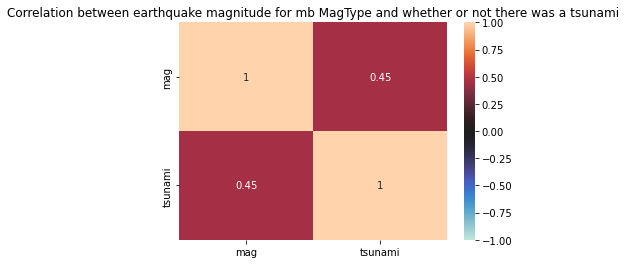

In [6]:
sns.heatmap(
    quake.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.yticks
plt.title('Correlation between earthquake magnitude for mb MagType and whether or not there was a tsunami')
#Answer to Exercise 1

Text(0.5, 1.15, 'Facebook volume traded and closing price with Tukey Fence bounds')

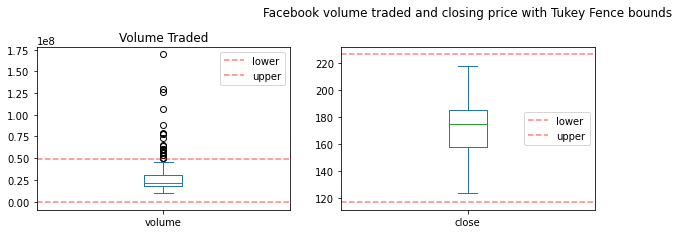

In [3]:
cols = ['volume', 'close']
subset = fb[cols]
quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]
axes = subset.plot(kind='box', subplots=True, figsize=(10, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='red', 
            linestyle='dashed',
            alpha =.5,
            label=name
        )
        ax.legend()
plt.title('Facebook volume traded and closing price with Tukey Fence bounds', y= 1.15)
#Answer to Exercise 2

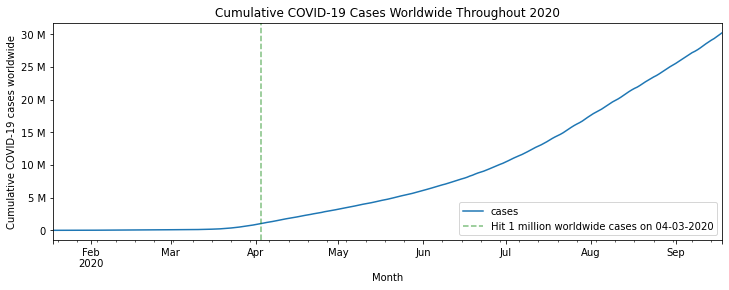

In [9]:
from matplotlib.ticker import EngFormatter
cumulative_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

ax = cumulative_cases.plot(title='Cumulative COVID-19 Cases Worldwide Throughout 2020', figsize=(12, 4))
ax.set_xlabel('Month')
ax.set_ylabel('Cumulative COVID-19 cases worldwide')
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cumulative_cases[cumulative_cases >= 10e5].index[0]
ax.axvline(over_1M, linestyle='--', color='g', alpha=0.5, label=f"Hit 1 million worldwide cases on {over_1M.strftime('%m-%d-%Y')}")

ax.legend()
#Answer to Exercise 3

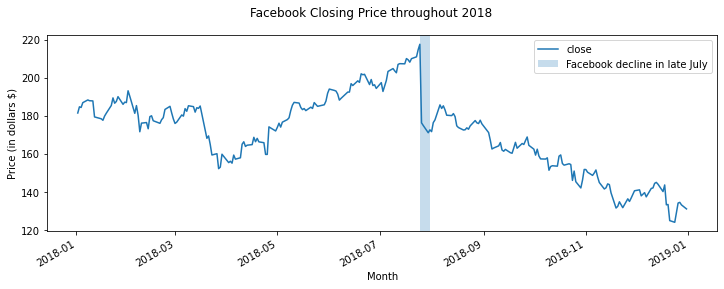

In [5]:
fb.close.plot(kind='line', figsize=(12, 4))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.25, label='Facebook decline in late July',
)
plt.xlabel('Month')
plt.ylabel('Price (in dollars $)')
plt.suptitle('Facebook Closing Price throughout 2018')
plt.legend()
#Answer to Exercise 4